# Test MATCHER

**Imports**

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pkg_resources
from pymatcher import matcher

**Read reduced thymus F74 Data**



In [22]:
f74_rna = np.genfromtxt("/home/jovyan/my_data/F74_RNA_redDim.csv",delimiter=',')
f74_atac = np.genfromtxt("/home/jovyan/my_data/F74_ATAC_redDim.csv",delimiter=',')

f74_rna = f74_rna[1:,1:]
f74_atac = f74_atac[1:,1:]

**Use MATCHER to Infer Pseudotime and Master Time**

Try on subset of cells

In [4]:
# small_rna = f74_rna[0:1000,]
# small_atac = f74_atac[0:1000,]

In [23]:
X = [f74_rna,f74_atac]
m = matcher.MATCHER(X)
m.infer()

In [24]:
m.learn_warp_function(1,reverse=False)


In [25]:
model0 = m.model[0]

In [26]:
model0

bayesian_gplvm.,value,constraints,priors
latent space.mean,"(7101, 1)",,
latent space.variance,"(7101, 1)",+ve,
inducing inputs,"(10, 1)",,
rbf.variance,108.43811662495756,+ve,
rbf.lengthscale,1.4734128925080912,+ve,
Gaussian_noise.variance,3.32641677750352,+ve,


**Plot Warping Functions**

We can now examine the relationship between pseudotime and master time by plotting the warping functions inferred by MATCHER. The x-axis on each plot is pseudotime and the y-axis is master time.

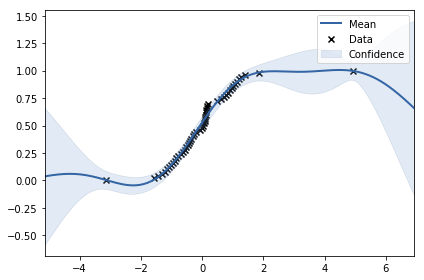

In [27]:
ax = m.warp_functions[0].plot()

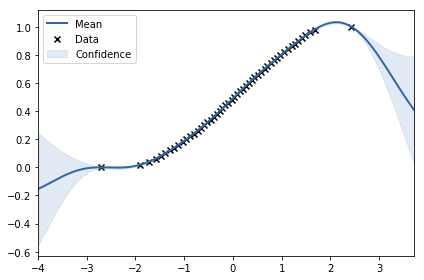

In [29]:
ax = m.warp_functions[1].plot()

**Write Inferred Pseudotime Values to File**

In [30]:
np.savetxt("/home/jovyan/models/test_RNA_pseudotime.csv",m.model[0].latent_space.mean,delimiter=",")
np.savetxt("/home/jovyan/models/test_ATAC_pseudotime.csv",m.model[1].latent_space.mean,delimiter=",")

**Write Inferred Master Time Values to File**

In [31]:
np.savetxt("/home/jovyan/models/test_RNA_master_time.csv",m.master_time[0],delimiter=",")
np.savetxt("/home/jovyan/models/test_ATAC_master_time.csv",m.master_time[1],delimiter=",")

**Inspect the Gaussian Process Mapping from Pseudotime to Gene Expression Space for the DNMT3B Gene**

AttributeError: 'dict' object has no attribute 'scatter'

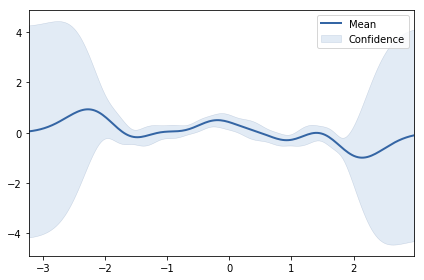

In [53]:
m.plot_feature(0,10)

**Use MATCHER to Infer Simultaneous Gene Expression and DNA Methylation Measurements**

ValueError: 'c' argument has 177 elements, which is not acceptable for use with 'x' with size 177, 'y' with size 177.

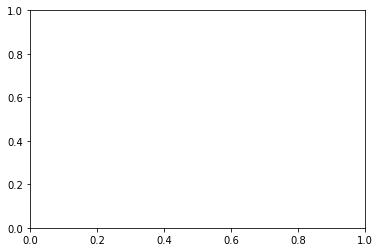

In [21]:
corr_feat = m.infer_corresponding_features(0,1,np.array(range(0,34)),np.array(range(0,27)))
m.plot_corresponding_features(0,1,10,18)
plt.xlabel('DNMT3B Gene Expression')
plt.ylabel('DPPA3 Promoter Methylation')

**Use MATCHER to Infer Correlation Between Gene Expression and DNA Methylation**

In [10]:
exp_met_corr = m.correlation(0,1,np.array(range(0,34)),np.array(range(0,27)),method="Spearman")

 /nas/longleaf/apps/anaconda/4.3.0/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2569: RuntimeWarning:invalid value encountered in true_divide
 /nas/longleaf/apps/anaconda/4.3.0/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2570: RuntimeWarning:invalid value encountered in true_divide
 /nas/longleaf/apps/anaconda/4.3.0/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning:invalid value encountered in greater
 /nas/longleaf/apps/anaconda/4.3.0/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning:invalid value encountered in less
 /nas/longleaf/apps/anaconda/4.3.0/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning:invalid value encountered in less_equal


**Infer Shared Master Time from Gene Expression and DNA Methylation**

Adding a second level list to the MATCHER input tells MATCHER that we want to infer shared master time for the datasets in the second level list. Note that it is possible to infer shared master time for some datasets for which correspondences are known while also inferring master time for other data types where the correspondence is not known. For example, we could infer shared master time from sc-GEM data and a separate set of master time values for scATAC-seq data.

In [11]:
X = [[cheow_exp,cheow_met]]
m = matcher.MATCHER(X)
m.infer()

**Plot Warping Function for Shared Master Time**

 /nas/longleaf/apps/anaconda/4.3.0/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


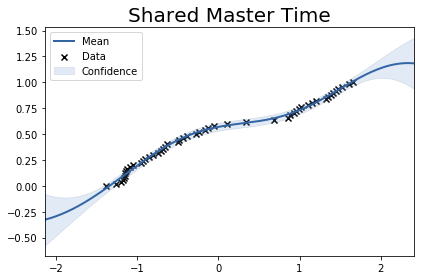

In [12]:
ax = m.warp_functions[0].plot()
ax.legend(loc='best')
plt.title("Shared Master Time",fontsize=20)